# SVM classification SZ vs. HC. 5-fold cross validation

In this tutorial, our objective is to distinguish individuals with schizophrenia from healthy controls by employing (1) cortical thickness deviation scores (z-scores), as well as (2) the actual cortical thickness data, using so called [support vector machines](https://scikit-learn.org/stable/modules/svm.html). Through this analysis, we aim to determine which type of data exhibits stronger discriminatory power in terms of effectively separating the two groups.

In [1]:
%%capture
! git clone https://github.com/CharFraza/CPC_ML_tutorial.git

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir('/content/CPC_ML_tutorial/')

In [3]:
Z_df = pd.read_csv('data/fcon1000_te_Z.csv')

In [13]:
%%capture
!pip install --upgrade scikit-learn

In [5]:
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [6]:
Z_df.dropna(subset=['group'], inplace=True)
Z_df['group'] = Z_df['group'].replace("SZ",0)
Z_df['group'] = Z_df['group'].replace("Control",1)

/tmp/ipython-input-6-383852652.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Z_df['group'] = Z_df['group'].replace("Control",1)


In [7]:
deviations = Z_df.loc[:, Z_df.columns.str.contains('Z_predict')]

In [8]:
cortical_thickness = Z_df.loc[:, Z_df.columns.str.endswith('_thickness')]

In [9]:
# Data IO and generation
X1 = deviations
X2 = cortical_thickness
y = Z_df['group']
n_samples, n_features = X1.shape
random_state = np.random.RandomState(0)

In [10]:
X1 = X1.to_numpy()
X2 = X2.to_numpy()
y = y.astype(int)
y = y.to_numpy()

Here we do classification using a linear SVM with 5-fold stratified cross-validation and evaluate the performance using Receiver Operating Characteristic (ROC) curves. Afterwards, we:
1. Plot the ROC for each fold
2. Compute the mean ROC curve with its Area Under the Curve (AUC) and standard deviation
3. Visualize the overall classification performance between schizophrenia (SZ) and healthy control (HC) groups using **deviations scores** as input features.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWa

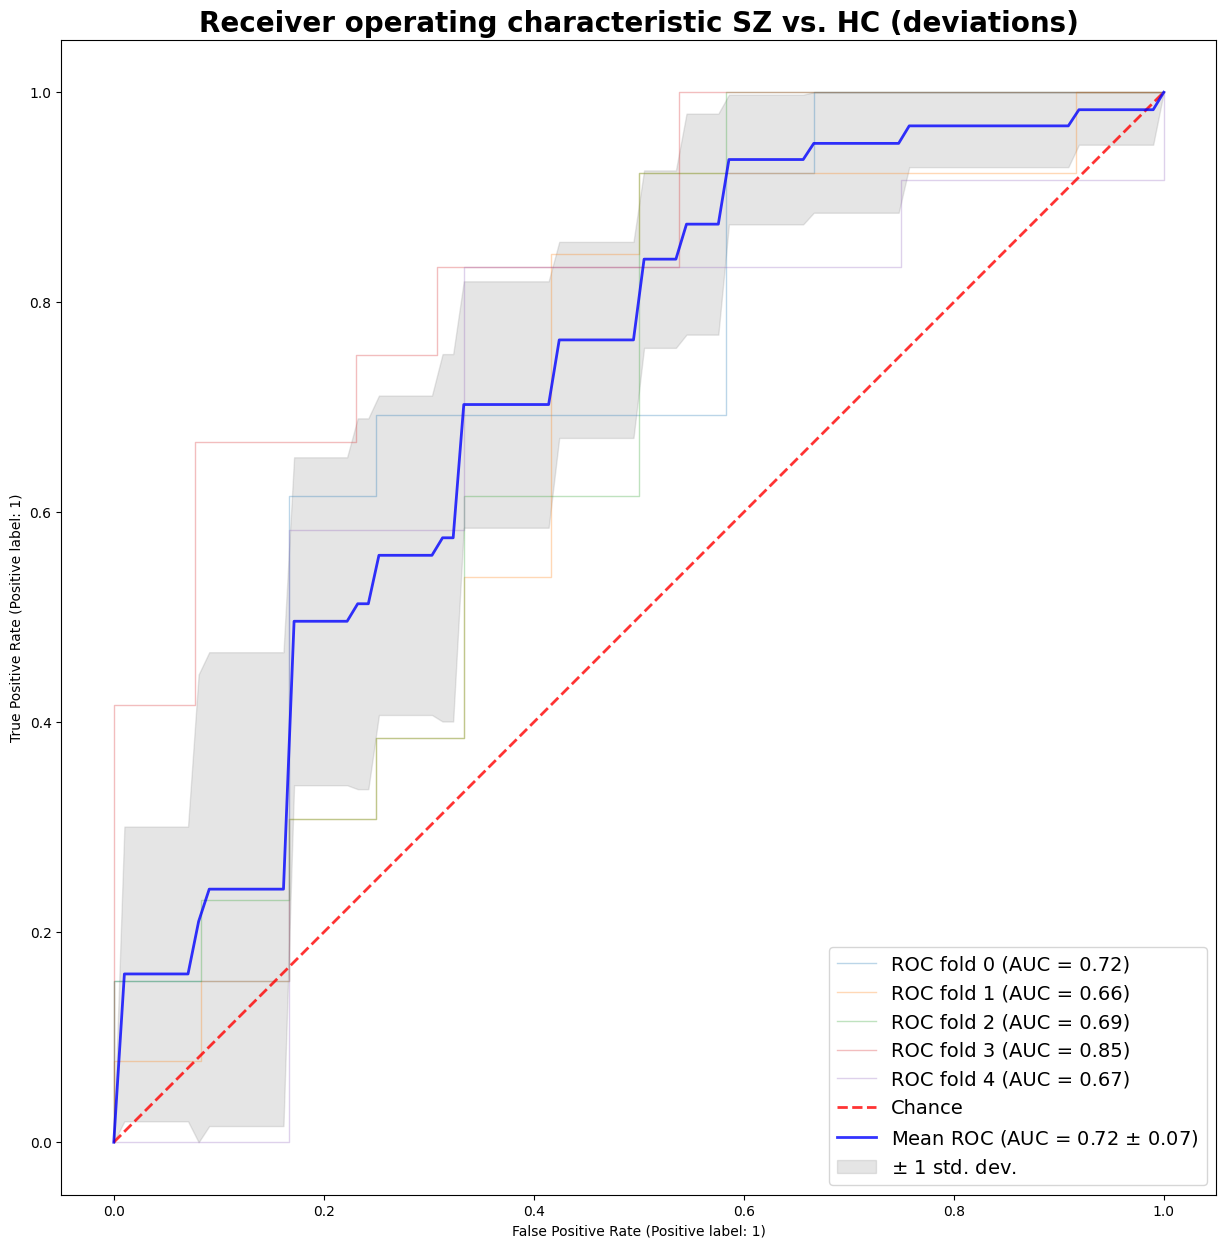

In [11]:
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(15,15))
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 25, 'xtick.labelsize':16,'ytick.labelsize':16,'legend.fontsize':14,'legend.title_fontsize':16}
plt.rcParams.update(parameters)

for i, (train, test) in enumerate(cv.split(X1, y)):
    classifier.fit(X1[train], y[train])
    viz = RocCurveDisplay.from_estimator(classifier, X1[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.set_title('Receiver operating characteristic SZ vs. HC (deviations)', fontweight="bold", size=20)
ax.legend(loc="lower right")
plt.show()

Here we do classification using a linear SVM with 5-fold stratified cross-validation and evaluate the performance ROC curves. Afterwards, we:

1. Plot the ROC for each fold
2. Compute the mean ROC curve with its AUC and standard deviation
3. Visualize the overall classification performance between SZ and HC groups using **cortical thickness** features as input.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWa

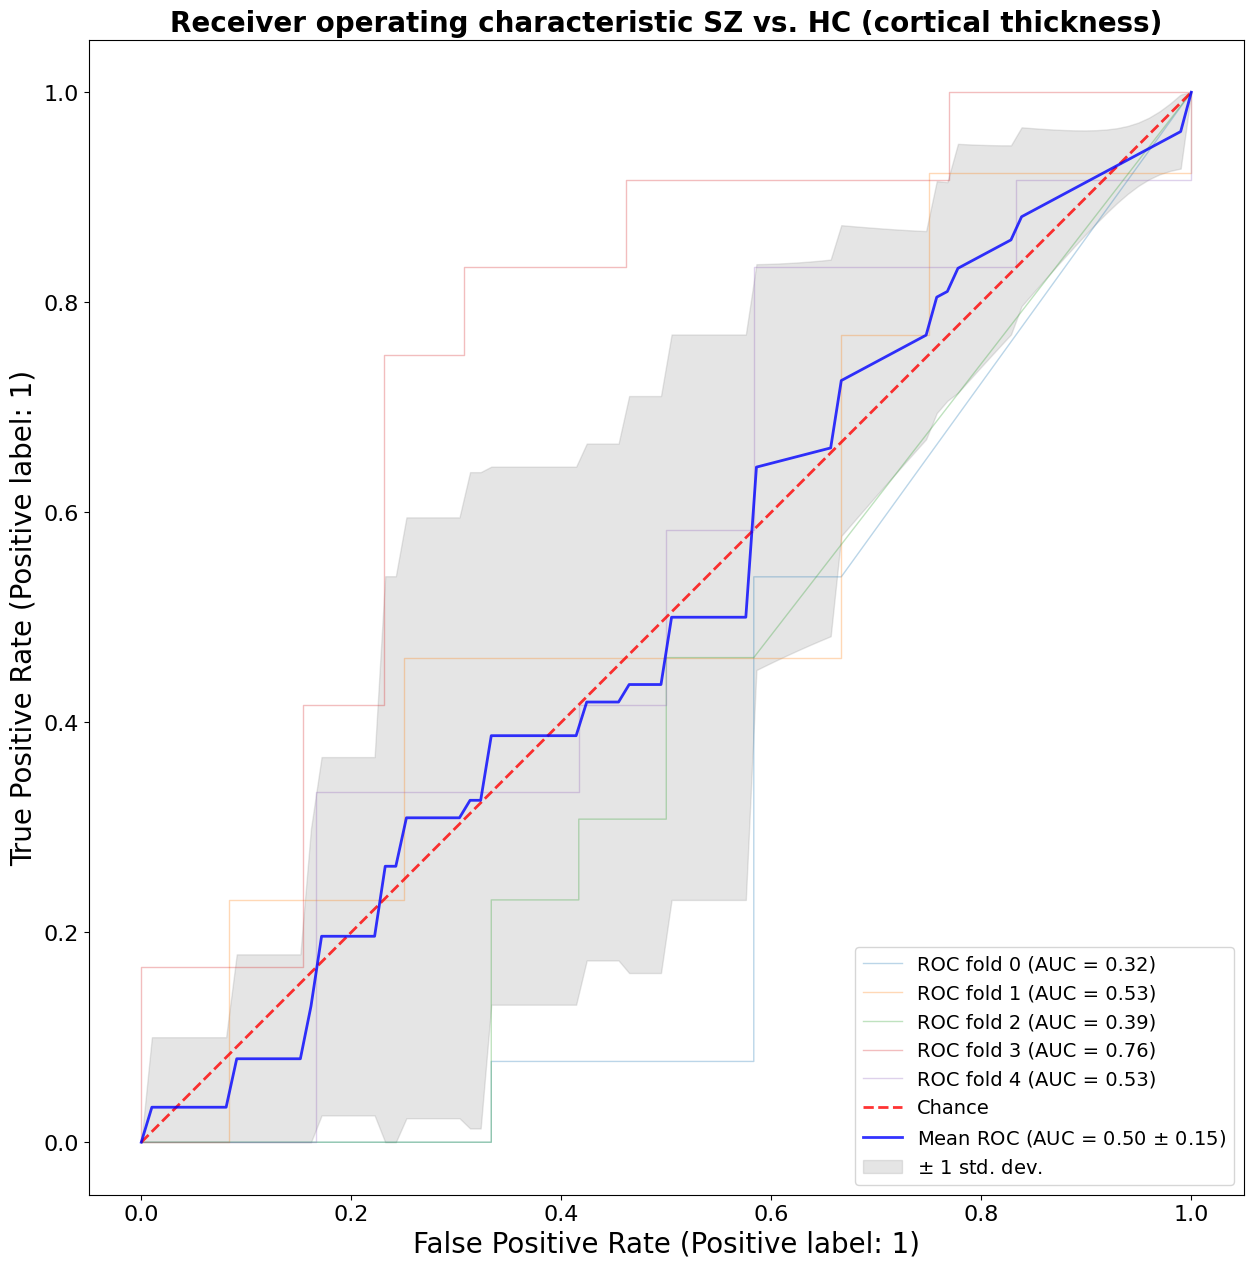

In [12]:
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(15,15))
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 25, 'xtick.labelsize':16,'ytick.labelsize':16,'legend.fontsize':14,'legend.title_fontsize':16}
plt.rcParams.update(parameters)

for i, (train, test) in enumerate(cv.split(X2, y)):
    classifier.fit(X2[train], y[train])
    viz = RocCurveDisplay.from_estimator(classifier, X2[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.set_title('Receiver operating characteristic SZ vs. HC (cortical thickness)', fontweight="bold", size=20)
ax.legend(loc="lower right")
plt.show()

## Questions
1. Which specific brain feature or imaging measure demonstrates superior discriminatory power for classifying individuals with schizophrenia (SZ) and healthy controls (HC)?
2. What particular brain disorder would be a compelling and valuable target for investigation using normative modeling techniques?
3. In comparison to alternative approaches, what aspects make normative modeling particularly interesting for applications in a clinical context?
4. What ethical considerations should be taken into account when employing machine learning methods in a clinical setting, specifically pertaining to normative modeling?

## Suggested further readings
1. [Unpacking the functional heterogeneity of the Emotional Face Matching Task: a normative modelling approach](https://www.biorxiv.org/content/10.1101/2023.03.27.534351v2.abstract)
2. [Mapping individualised patterns of atrophy in Alzheimer’s disease using neuroanatomical normative models](https://alz-journals.onlinelibrary.wiley.com/doi/full/10.1002/alz.060306)
3. [Replicating extensive brain structural heterogeneity in individuals with schizophrenia and bipolar disorder
](https://onlinelibrary.wiley.com/doi/full/10.1002/hbm.25386)
4. [Fractionating autism based on neuroanatomical normative modeling](https://www.nature.com/articles/s41398-020-01057-0)
